In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('data/haberman.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
sum(df.duplicated())

17

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = df.iloc[:,df.columns != 'status']
y = df.status

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [9]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

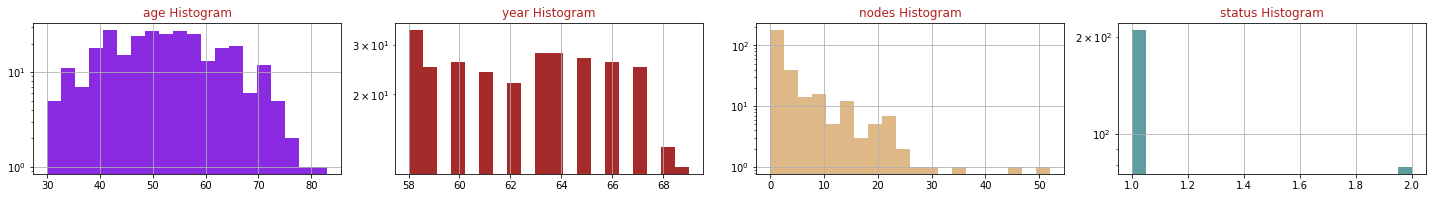

In [10]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

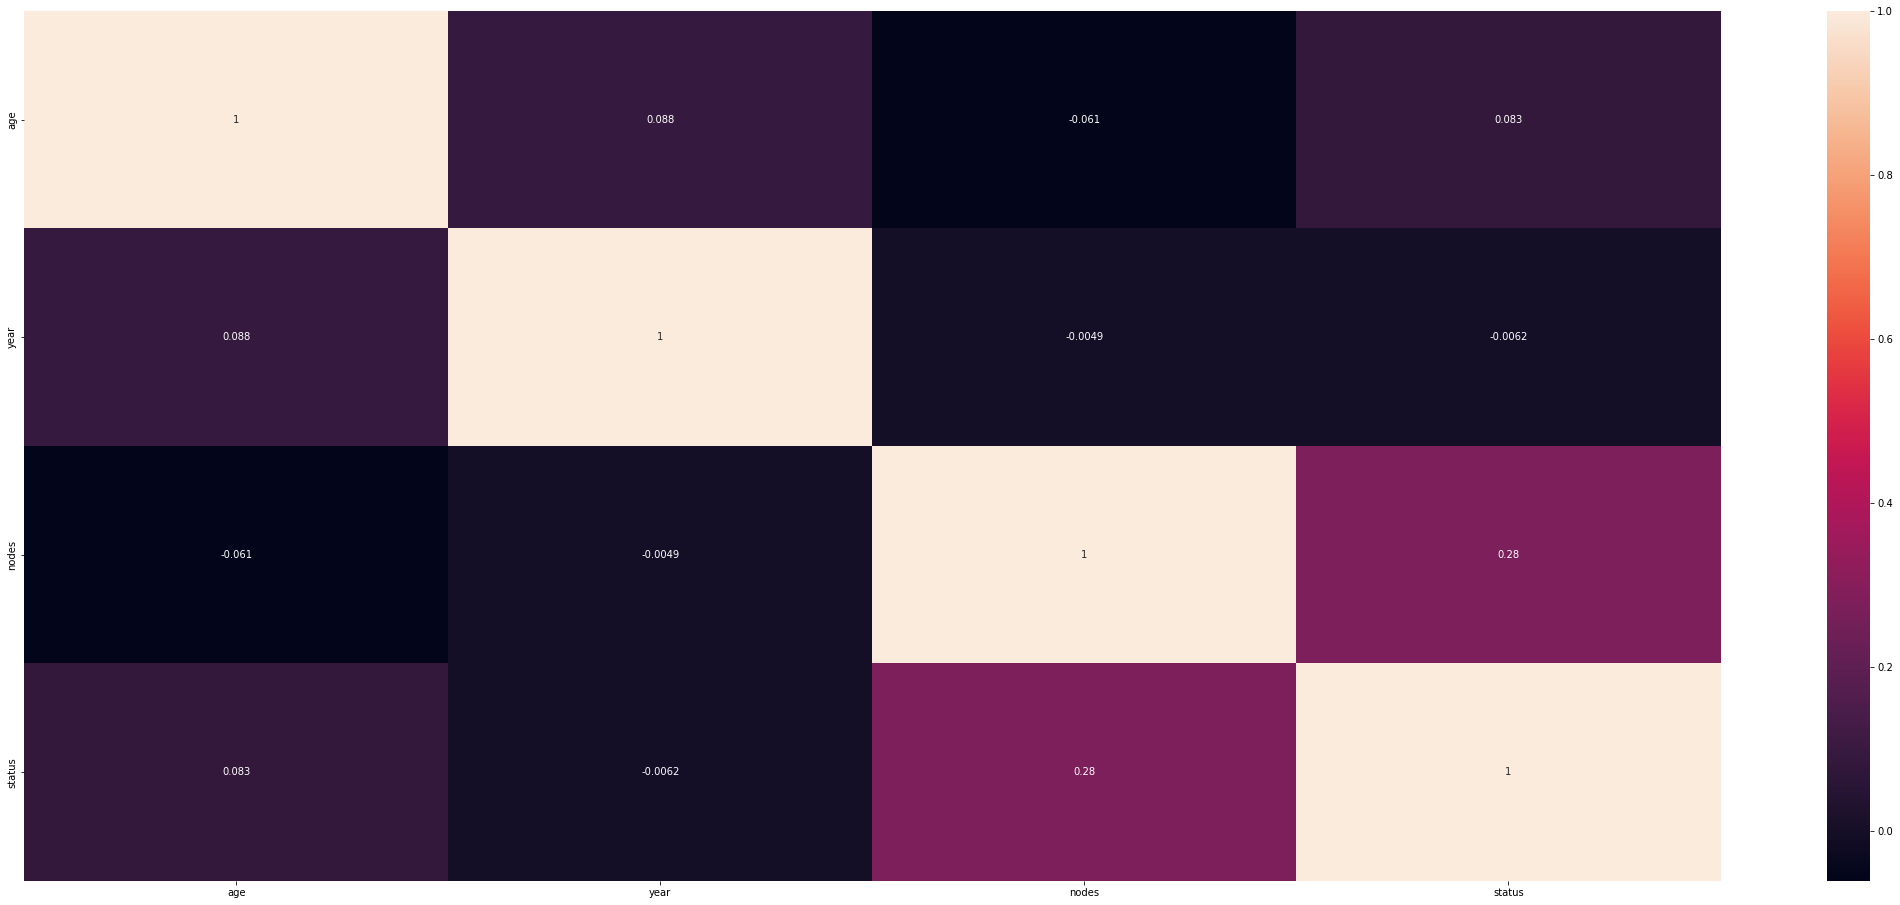

In [11]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 73.16017316017316


In [15]:
X_test_scaled = scaler.transform(X_test)
train_acc = model.score(X_test_scaled, y_test)
print("The Accuracy for Testing Set is {}".format(train_acc*100))

The Accuracy for Testing Set is 74.13793103448276


In [16]:
y_test

187    1
258    2
211    1
50     1
283    1
0      1
113    1
97     2
163    1
77     1
103    1
172    1
36     1
88     1
278    1
300    1
279    1
10     1
75     2
208    1
169    2
201    1
154    1
139    1
2      1
124    2
136    2
121    1
44     2
150    1
24     2
236    1
175    1
149    1
223    2
56     1
221    1
32     1
144    2
268    2
209    1
5      1
254    1
226    1
215    2
95     1
109    2
147    1
192    1
34     2
182    1
162    1
37     1
160    2
115    2
298    1
264    1
9      1
Name: status, dtype: int64

In [50]:
accs=[]
accuracies = [];
precisions = [];
recalls = [];
fmeasures = [];
for i in range(20):
    X = df.iloc[:,df.columns != 'status']
    y = df.status
    
    X, X_valid, y, y_valid = train_test_split(
    X, y, test_size=0.10, random_state=6, stratify=y)
    
    scaler = preprocessing.StandardScaler().fit(X_valid)
    X_valid_scaled = scaler.transform(X_valid)
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=6, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    best_model = None
    valid = 0.0
    
    for j in range(3):
        if j==0:
            model = LogisticRegression()
        if j==1:
            model = LogisticRegression(class_weight = 'balanced')
        if j==2:
            model = LogisticRegression(fit_intercept = False)
        model.fit(X_train_scaled, y_train)
        val = model.score(X_valid_scaled, y_valid)
        print("acc: ", val)
        precision = precision_score(model.predict(X_valid_scaled), y_valid)
        recall = recall_score(model.predict(X_valid_scaled), y_valid)
        fmeasure = f1_score(model.predict(X_valid_scaled), y_valid)
        print("precision: ", precision)
        print("recall: ", recall)
        accuracies += [val]
        precisions += [precision]
        recalls += [recall]
        fmeasures += [fmeasure]
        
        if val > valid:
            valid = val
            best_model = model
    model = best_model
    model.fit(X_train_scaled, y_train)
    scaler = preprocessing.StandardScaler().fit(X_test)
    X_test_scaled = scaler.transform(X_test)
    train_acc = model.score(X_test_scaled, y_test)
    accs+=[train_acc*100]
print(accuracies)
print(precisions)
print(recalls)

acc:  0.7586206896551724
precision:  1.0
recall:  0.75
acc:  0.6551724137931034
precision:  0.7142857142857143
recall:  0.7894736842105263
acc:  0.6206896551724138
precision:  0.6666666666666666
recall:  0.7777777777777778
acc:  0.7586206896551724
precision:  1.0
recall:  0.75
acc:  0.6551724137931034
precision:  0.7142857142857143
recall:  0.7894736842105263
acc:  0.6206896551724138
precision:  0.6666666666666666
recall:  0.7777777777777778
acc:  0.7586206896551724
precision:  1.0
recall:  0.75
acc:  0.6551724137931034
precision:  0.7142857142857143
recall:  0.7894736842105263
acc:  0.6206896551724138
precision:  0.6666666666666666
recall:  0.7777777777777778
acc:  0.7586206896551724
precision:  1.0
recall:  0.75
acc:  0.6551724137931034
precision:  0.7142857142857143
recall:  0.7894736842105263
acc:  0.6206896551724138
precision:  0.6666666666666666
recall:  0.7777777777777778
acc:  0.7586206896551724
precision:  1.0
recall:  0.75
acc:  0.6551724137931034
precision:  0.71428571428571

In [25]:
accs

[73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307,
 73.07692307692307]

In [19]:
model.predict_proba(X_test_scaled)

array([[0.62680953, 0.37319047],
       [0.73834193, 0.26165807],
       [0.77264855, 0.22735145],
       [0.70470068, 0.29529932],
       [0.76892295, 0.23107705],
       [0.80567725, 0.19432275],
       [0.46776871, 0.53223129],
       [0.80678498, 0.19321502],
       [0.84142314, 0.15857686],
       [0.47760434, 0.52239566],
       [0.76973177, 0.23026823],
       [0.72961991, 0.27038009],
       [0.86442449, 0.13557551],
       [0.82863247, 0.17136753],
       [0.71682021, 0.28317979],
       [0.63895294, 0.36104706],
       [0.54327766, 0.45672234],
       [0.71996717, 0.28003283],
       [0.84004276, 0.15995724],
       [0.70718596, 0.29281404],
       [0.81816794, 0.18183206],
       [0.79268905, 0.20731095],
       [0.754234  , 0.245766  ],
       [0.7335762 , 0.2664238 ],
       [0.65605717, 0.34394283],
       [0.72880581, 0.27119419]])

In [26]:
model.predict(X_test_scaled)

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [27]:
y_test

136    2
225    1
131    1
197    2
205    1
39     1
168    2
118    1
35     1
9      1
183    1
127    1
0      1
46     1
138    1
167    2
43     2
280    1
42     1
170    2
56     1
135    1
193    1
156    2
296    1
222    1
Name: status, dtype: int64

In [28]:
accs=[0.7586206896551724,
0.6551724137931034,
0.6206896551724138,
0.7586206896551724,
0.6551724137931034,
0.6206896551724138,
0.7586206896551724,
0.6551724137931034,
0.6206896551724138,
0.7586206896551724,]

In [31]:
for i in range(len(accs)):
    accs[i] = accs[i] * 100
accs

[75.86206896551724,
 65.51724137931035,
 62.06896551724138,
 75.86206896551724,
 65.51724137931035,
 62.06896551724138,
 75.86206896551724,
 65.51724137931035,
 62.06896551724138,
 75.86206896551724]

In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [34]:
precision = precision_score(model.predict(X_test_scaled), y_test)
recall = recall_score(model.predict(X_test_scaled), y_test)

In [35]:
precision

0.9473684210526315

In [36]:
recall

0.75

In [46]:
print(accuracies)
print(precisions)
print(recalls)

import numpy as np
import scipy.stats as st

#define sample data
data = accuracies

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

[0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034, 0.6206896551724138, 0.7586206896551724, 0.6551724137931034,

(0.6628927314711968, 0.6934291076092631)

In [47]:
data = precisions

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.7553040265641198, 0.8319975607374674)

In [48]:
data = recalls

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.7681044899575854, 0.7767298180346177)

In [51]:
data = fmeasures

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.7595255589838772, 0.7905354910771727)